# Principal Component Analysis

PCA is a dimensionality reduction method used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. 

## Data

**In this example, we use the *digits* dataset. It contains around 1800 samples. Each sample corresponds to the image of a handwritten digit between 0 and 9. These images are composed of 8x8 pixels, or 64 features.** 

**With this number of features, it is difficult to visualize our dataset. Moreover, projecting high-dimensional data into a lower-dimensional space (= reducing the number of features) can help capture the most important information contained in the data.**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

In [6]:
# load the dataset from sklearn
data = pd.DataFrame(datasets.load_digits(as_frame=True)['data'])

# see first few rows
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
data.shape

(1797, 64)

**As said in the intro, the dataset is composed of 64 features. We want to represent this dataset in a new space of lower dimension, which we will do by applying PCA.**

## PCA

**The first step before applying PCA is to scale the data so that each feature has a single unit variance.**

In [8]:
from sklearn.preprocessing import StandardScaler

# instanciate scaler object
scaler = StandardScaler()

# fit scaler to our data
scaler.fit(data)

# scale our data
data_scaled = scaler.transform(data)

**We can now apply PCA to the scaled data. If you have previous knowledge or constraints, you can choose the number of components to keep (for example, if we need our data to be visualizable in the 2D space, we can choose to only keep the first two components). Otherwise, you can choose not to specify the number of components. In this case, the algorithm will default to the minimum between the number of samples and number of features.**

**We have no prior knowledge of our data, so we can leave this argument blank, and the algorithm will find 64 components (= number of features of our dataset, since it is inferior to the number of samples).**

In [9]:
from sklearn.decomposition import PCA

# instanciate a PCA object
pca = PCA() 

# fit the object to our data
pca.fit(data_scaled)

# apply PCA to our data to get new coordinates
data_pca = pca.transform(data_scaled)

In [10]:
data_pca.shape

(1797, 64)

**Since we did not specify how many components we wanted to keep, `pca_data` has the same shape as our original data. However, the variable are now components, not pixels.** 

## Choice of number of components

**The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:**

In [11]:
# Explained variance (eigenvalues)
print("Explained variance")
print(pca.explained_variance_)

# Corrected variance values 
n = len(data_pca) # number of samples
corrected_variance = (n/(n-1))*pca.explained_variance_
print("\nCorrected variance")
print(corrected_variance)

Explained variance
[7.34477606e+00 5.83549054e+00 5.15396118e+00 3.96623597e+00
 2.96634520e+00 2.57204442e+00 2.40600941e+00 2.06867355e+00
 1.82993314e+00 1.78951739e+00 1.69784616e+00 1.57287889e+00
 1.38870781e+00 1.35933609e+00 1.32152536e+00 1.16829176e+00
 1.08368678e+00 9.99778617e-01 9.74382931e-01 9.08912418e-01
 8.22719264e-01 7.76310139e-01 7.11556753e-01 6.45523648e-01
 5.95273988e-01 5.76501797e-01 5.26731552e-01 5.10636301e-01
 4.86863813e-01 4.55601071e-01 4.42851552e-01 4.22300863e-01
 3.99106303e-01 3.91101111e-01 3.60945168e-01 3.48603059e-01
 3.19596300e-01 2.94066271e-01 2.76922851e-01 2.58273004e-01
 2.47830286e-01 2.42356600e-01 2.17581996e-01 2.07995927e-01
 2.00090902e-01 1.89835165e-01 1.76128942e-01 1.68752359e-01
 1.58184741e-01 1.43114274e-01 1.33210813e-01 1.24263708e-01
 1.19328984e-01 1.11886547e-01 1.02504338e-01 9.84087608e-02
 9.01854301e-02 8.24681230e-02 7.63539426e-02 6.32896150e-02
 5.03744402e-02 1.97430140e-31 3.90222011e-32 3.84266959e-32]

Cor

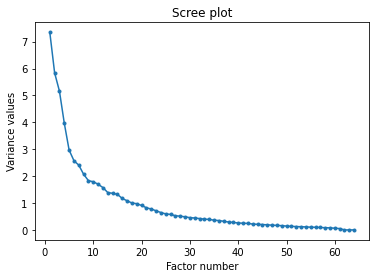

In [13]:
# plot the explained variance of each component
p = data_pca.shape[1] # number of components
plt.plot(np.arange(1,p+1),corrected_variance, marker='.')
plt.title("Scree plot")
plt.ylabel("Variance values")
plt.xlabel("Factor number")
plt.show()

**This plot shows the variance explained by each component. The first component explains the most variance, then the second... This plot is a visual representation of the `corrected variance` we printed above.**

**We can also look at the explained variance ratio of each component: it is the percentage of the total variance explained by each component. Looking at this ratio, and more specifically at the cumulative ratio (% of total variance explained by multiple components) will help us decide how many components to keep.**

In [14]:
pca.explained_variance_ratio_*100

array([1.20339161e+01, 9.56105440e+00, 8.44441489e+00, 6.49840791e+00,
       4.86015488e+00, 4.21411987e+00, 3.94208280e+00, 3.38938092e+00,
       2.99822101e+00, 2.93200255e+00, 2.78180546e+00, 2.57705509e+00,
       2.27530332e+00, 2.22717974e+00, 2.16522943e+00, 1.91416661e+00,
       1.77554709e+00, 1.63806927e+00, 1.59646017e+00, 1.48919119e+00,
       1.34796957e+00, 1.27193137e+00, 1.16583735e+00, 1.05764660e+00,
       9.75315947e-01, 9.44558990e-01, 8.63013827e-01, 8.36642854e-01,
       7.97693248e-01, 7.46471371e-01, 7.25582151e-01, 6.91911245e-01,
       6.53908536e-01, 6.40792574e-01, 5.91384112e-01, 5.71162405e-01,
       5.23636803e-01, 4.81807586e-01, 4.53719260e-01, 4.23162753e-01,
       4.06053070e-01, 3.97084808e-01, 3.56493303e-01, 3.40787181e-01,
       3.27835335e-01, 3.11032007e-01, 2.88575294e-01, 2.76489264e-01,
       2.59174941e-01, 2.34483006e-01, 2.18256858e-01, 2.03597635e-01,
       1.95512426e-01, 1.83318499e-01, 1.67946387e-01, 1.61236062e-01,
      

In [15]:
cumulative_var = np.cumsum(pca.explained_variance_ratio_*100)
cumulative_var

array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  94.20102924,  94.6547485 ,  95.07791125,
        95.48396432,  95.88104913,  96.23754243,  96.57832961,
        96.90616495,  97.21719696,  97.50577225,  97.78226151,
        98.04143645,  98.27591946,  98.49417632,  98.69777395,
        98.89328638,  99.07660488,  99.24455127,  99.40578733,
        99.55355002,  99.68866843,  99.81376918,  99.91746491,
       100.        , 100.        , 100.        , 100.  

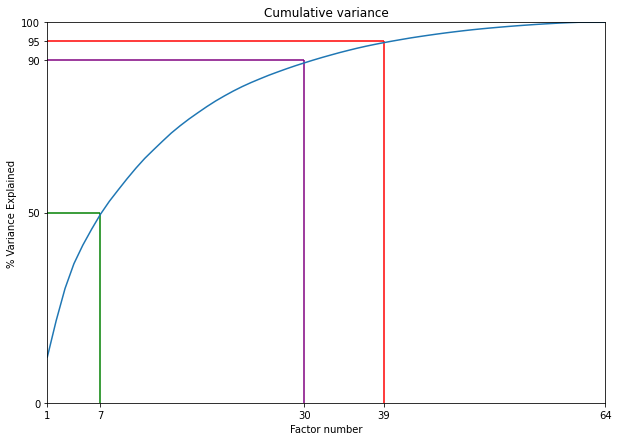

In [16]:
# plot the cumulative variance
plt.figure(figsize=(10,7))
plt.title("Cumulative variance")
plt.ylabel('% Variance Explained')
plt.xlabel('Factor number')

plt.hlines(y=95.0, xmin=0, xmax=39, color='red')
plt.vlines(x=39.0, ymin=0, ymax=95,color='red')

plt.hlines(y=90.0,xmin=0, xmax=30, color='purple')
plt.vlines(x=30.0, ymin=0, ymax=90, color='purple')

plt.hlines(y=50.0, xmin=0, xmax=7, color='green')
plt.vlines(x=7.0,ymin=0, ymax=50, color='green')

plt.ylim(0,100)
plt.xlim(1,64)
plt.yticks([0,50,90,95,100])
plt.xticks([1,7,30,39,64])
plt.style.context('seaborn-whitegrid')
plt.plot(np.arange(1,p+1),cumulative_var)
plt.show()

#Le but de ce graphes est de pouvoir voir le nombre idéal de réduction de dimension avant d'appliquer notre ACP
#Note: on remarque que la réduction de dimension 64->39 est idéal (95% d'inertie)

**This plot shows how much of the total variance is explained by the `x` first components. Dimensionality reduction is a compromise: we want to keep the lowest number of factors, while still explaining a good percentage of the variance.**

**As we can see on the figure in purple, 30 components are enough to explain 90% of the variance. This seems to be a good compromise: we explain most of the variance, while reducing the number of factors by more than half. 
In red we see that 39 components explain 95% of the variance, which means that each component after that carries very little information.**

## Interpretation of the components

**In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. We can visualize this relationship with a heatmap:**

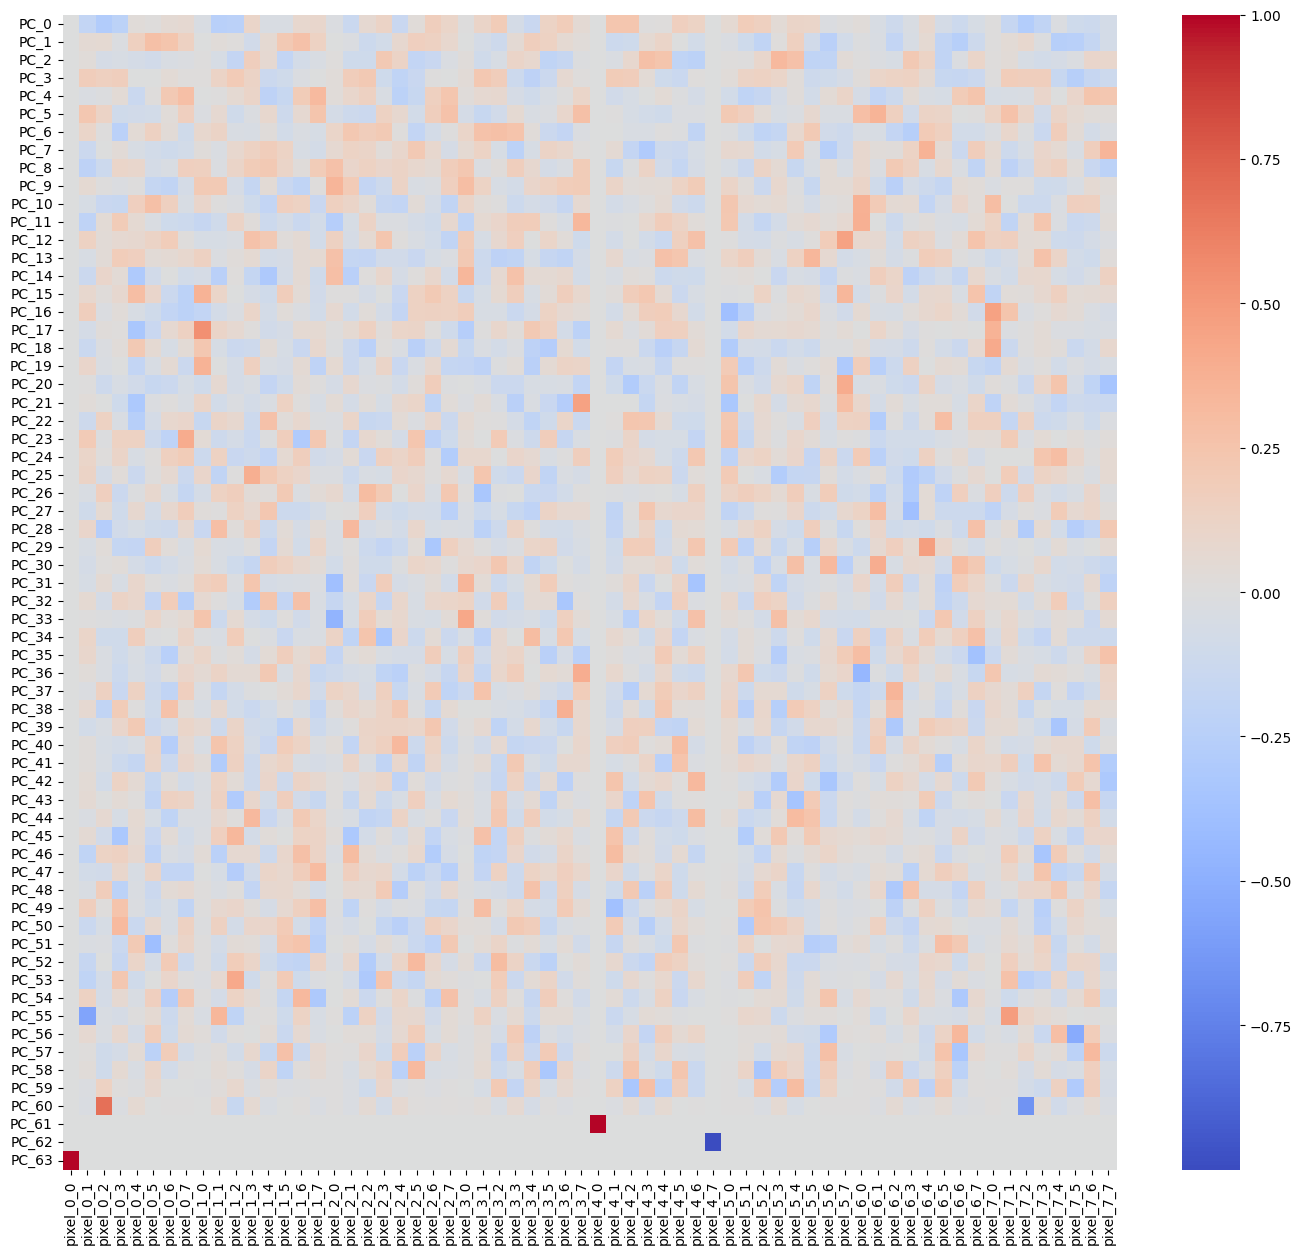

In [12]:
components = pd.DataFrame(pca.components_, columns=data.columns, index=[f"PC_{i}" for i in range(len(pca.components_))])

plt.figure(figsize=(17,15))
sns.heatmap(components,cmap='coolwarm',)
plt.show()

**The columns are the original features, and the rows are the PCA components. Each cell reflects the positive or negative correlation of the features with the components. If the cell is dark blue, it means the original feature is negatively correlated to the component, and if it is dark red then the correlation is positive. If the color is close to white, it means the component does not represent the information carried by the original feature.**

**Another useful representation is the correlation circle. It shows the first two components as the `x`and `y` axes. Then we plot the correlation of each of the original variables with the two components. The closer a feature is to the edge of the circle, the more it is explained by these two components.**

In [14]:
# Compute the correlation of the variables with the principal axes
sqrt_cor_var = np.sqrt(corrected_variance)
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = pca.components_[k,:] * sqrt_cor_var[k]

# Print the correlation matrix "variables x factors"
print(corvar)

[[ 3.29325014e-18 -1.84230508e-18 -8.10427052e-18 ...  0.00000000e+00
   0.00000000e+00  1.96081849e-16]
 [-4.94014119e-01  1.13633636e-01  5.35656659e-02 ... -2.70615994e-33
   3.51463311e-32 -5.55286151e-34]
 [-7.74953583e-01  1.43929299e-01 -1.28982321e-01 ...  3.08046628e-32
   5.89629463e-33  9.87461600e-34]
 ...
 [-2.79757305e-01 -5.86249082e-01 -5.05938067e-02 ...  7.71006173e-32
   2.75289822e-33  1.85228060e-33]
 [-3.24792065e-01 -3.98913178e-01  2.27916764e-01 ... -7.40165926e-32
  -2.36701044e-32 -2.33537292e-33]
 [-1.93810551e-01 -1.72356289e-01  2.09932189e-01 ... -2.46721975e-32
  -3.94724900e-33  2.74266775e-34]]


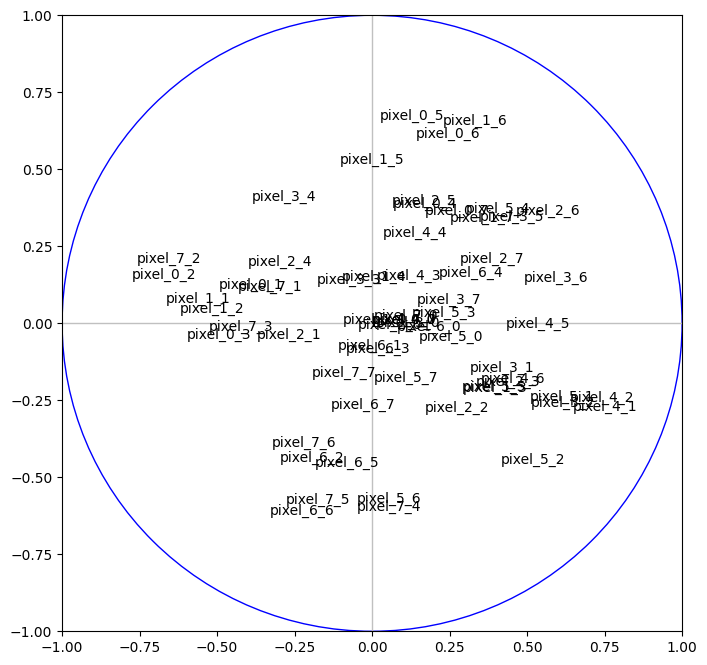

In [15]:
# Correlation circle
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
# Print the labels (variable names)
for j in range(p):
     plt.annotate(data.columns[j],(corvar[j,0],corvar[j,1]))

# Add the axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Add a circle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
# Print the correlation circle
plt.show()

## Dimensionality reduction

**Once we have studied the results of PCA, decided whether reducing the dimension of our dataset was a good idea or not, and if so, how many components to keep, we can reduce the dimensionality of our dataset. It is then this reduced dataset that will be used in downstream analyses like clustering.**

In [16]:
# When we looked at cumulative variance, we decided that the first 30 components
# were enough to get a good representation of our data, so we create a new data 
# object and only keep the first 30 components as variables

data_reduc = data_pca[:,:30]